# Multivariate Time Series Manipulation & Visualization

## Overview

<style>
    table.custom-table {
        max-width: 1000px;
        width: 100%;
        margin: 0 auto; /* centers the table on the page */
    }

    table.custom-table td {
        background-color: #fff;
    }
    
    table.custom-table th, table.custom-table td {
        text-align: center;
        vertical-align: middle;
        padding: 5px;
        width: 333px; /* distribute the total width equally among three columns */
    }

    table.custom-table img {
        width: 100%;
        display: block; /* removes any gap under the image */
    }
</style>


<table class="custom-table">
    <thead>
        <tr>
            <th>Output: Accumulated Generation</th>
            <th>Output: Technology Relationship</th>
            <th>Input: Hourly Energy Generation</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>
                <img src="src/03_output_2.png" alt="Solar Image 1">
            </td>
            <td>
                <img src="src/03_output_1.png" alt="Solar Image 2">
            </td>
            <td>
                <img src="src/03_input.png" alt="Solar Image 3">
            </td>
        </tr>
    </tbody>
</table>


## Data

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd #!

df = pd.read_csv('../../data/energy_generation_hourly_year.csv', index_col=0, parse_dates=True)
df

,Coal,Cogeneration,Combined Cycle (Gas),Eolic,Hydraulic,Non-Renewable Residues,Nuclear,Pumped Storage Hydropower,Renewables Other,Solar Photovoltaic,Solar Thermal
time,,,,,,,,,,,
2022-09-01 00:00:00,695.0,1155.1,14748.950,4387.050,899.675,273.7,6869.9,201.60,516.6,1.0,287.7
2022-09-01 01:00:00,750.0,1162.1,14255.600,4008.900,850.200,271.6,6881.9,117.70,514.4,1.0,247.7
...,...,...,...,...,...,...,...,...,...,...,...
2023-08-31 22:00:00,477.5,2153.4,10575.375,3057.950,3541.400,239.4,6866.0,946.25,510.7,17.6,607.9
2023-08-31 23:00:00,500.0,2127.7,9988.875,3028.675,3159.500,240.8,6869.0,334.95,511.9,17.4,619.8


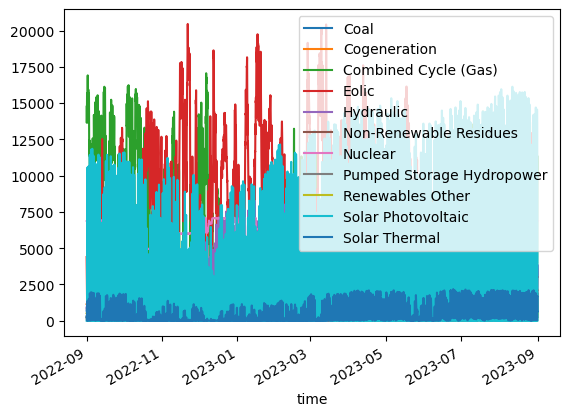

In [2]:
df.plot(); #!

## Resampling the Time
- [Date offset `rule` list](https://pandas.pydata.org/docs/user_guide/timeseries.html#dateoffset-objects)
- [Pandas plot `kind` list](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)

### Daily

<AxesSubplot: xlabel='time'>

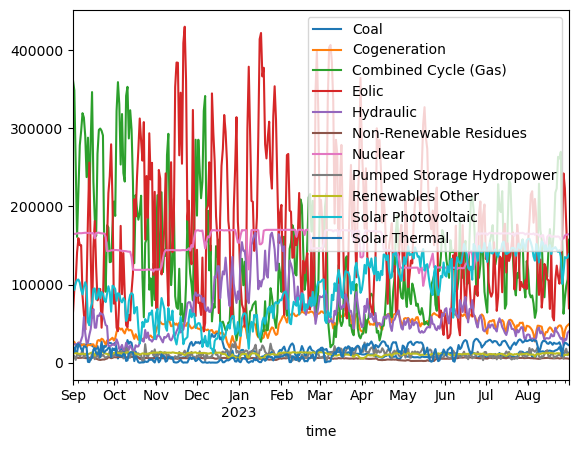

In [5]:
df.resample(rule='D').sum().plot() #!

<AxesSubplot: xlabel='time'>

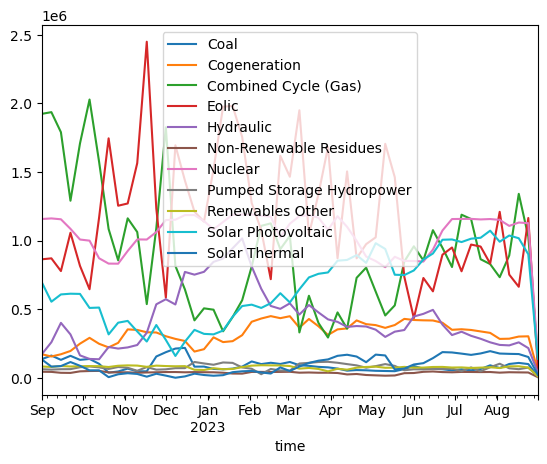

In [4]:
df.resample(rule='7D').sum().plot() #!

### Monthly

<AxesSubplot: xlabel='time'>

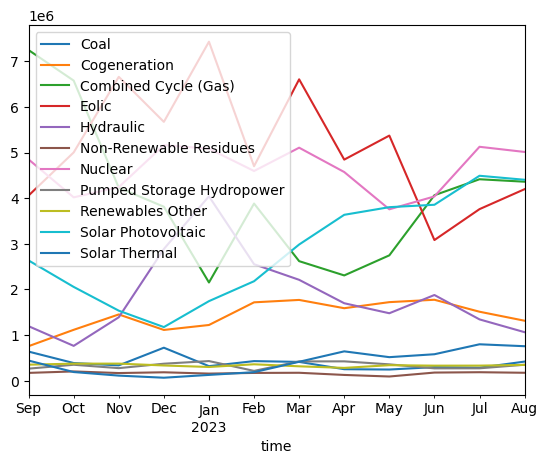

In [6]:
df.resample(rule='M').sum().plot() #!

<AxesSubplot: xlabel='time'>

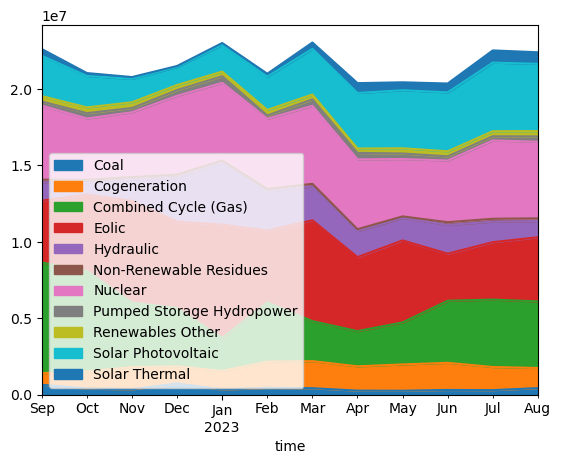

In [7]:
df.resample(rule='M').sum().plot.area() #!

<AxesSubplot: xlabel='time'>

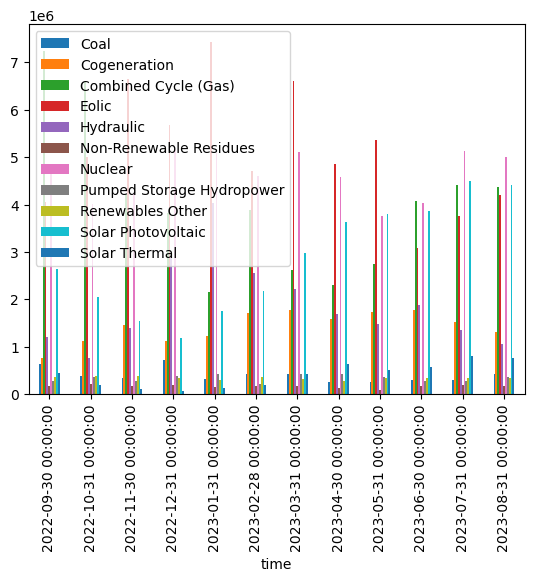

In [10]:
df.resample(rule='M').sum().plot.bar() #!

## Visualize Time Series Correlation

In [11]:
df

,Coal,Cogeneration,Combined Cycle (Gas),Eolic,Hydraulic,Non-Renewable Residues,Nuclear,Pumped Storage Hydropower,Renewables Other,Solar Photovoltaic,Solar Thermal
time,,,,,,,,,,,
2022-09-01 00:00:00,695.0,1155.1,14748.950,4387.050,899.675,273.7,6869.9,201.60,516.6,1.0,287.7
2022-09-01 01:00:00,750.0,1162.1,14255.600,4008.900,850.200,271.6,6881.9,117.70,514.4,1.0,247.7
...,...,...,...,...,...,...,...,...,...,...,...
2023-08-31 22:00:00,477.5,2153.4,10575.375,3057.950,3541.400,239.4,6866.0,946.25,510.7,17.6,607.9
2023-08-31 23:00:00,500.0,2127.7,9988.875,3028.675,3159.500,240.8,6869.0,334.95,511.9,17.4,619.8


In [15]:
df_weekly = df.resample(rule='7D').mean()

<AxesSubplot: xlabel='Coal', ylabel='Eolic'>

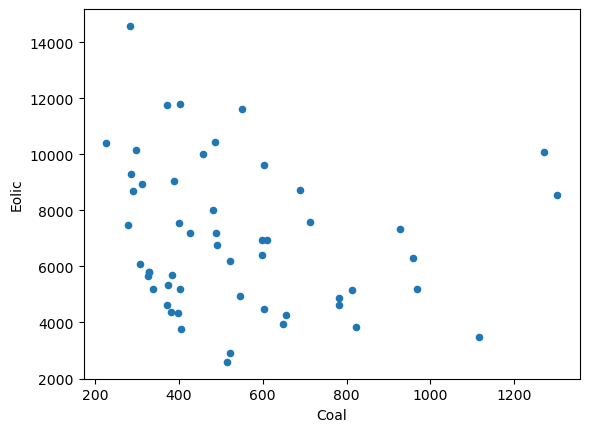

In [17]:
df_weekly.plot.scatter(x='Coal', y='Eolic')

<AxesSubplot: xlabel='Hydraulic', ylabel='Eolic'>

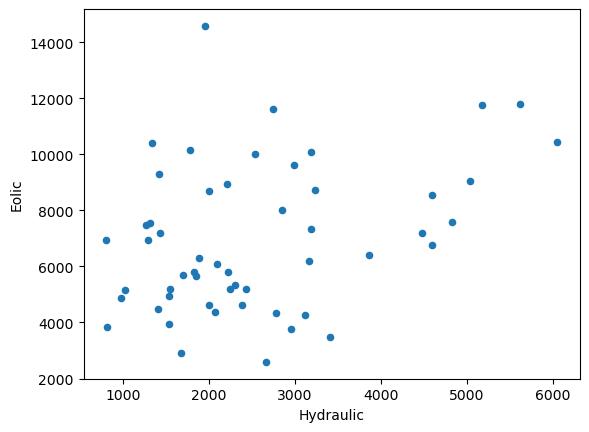

In [18]:
df_weekly.plot.scatter(x='Hydraulic', y='Eolic')

In [16]:
df_weekly

,Coal,Cogeneration,Combined Cycle (Gas),Eolic,Hydraulic,Non-Renewable Residues,Nuclear,Pumped Storage Hydropower,Renewables Other,Solar Photovoltaic,Solar Thermal
time,,,,,,,,,,,
2022-09-01,812.773810,1025.554601,11451.133280,5143.081583,1028.604286,265.456798,6890.202381,375.094839,493.738494,4142.044500,797.305208
2022-09-08,968.987006,928.346738,11524.701542,5184.599363,1546.559310,259.834625,6916.328077,358.474548,473.881286,3303.769399,490.117923
...,...,...,...,...,...,...,...,...,...,...,...
2023-08-24,599.306554,1803.254161,6127.811720,6934.034327,1291.491768,233.904167,6710.843452,446.601494,448.658280,5359.106036,905.663369
2023-08-31,522.983333,2059.771083,6561.120833,2901.948833,1678.407625,210.295833,6853.738542,502.804167,473.942958,5786.667542,932.800667


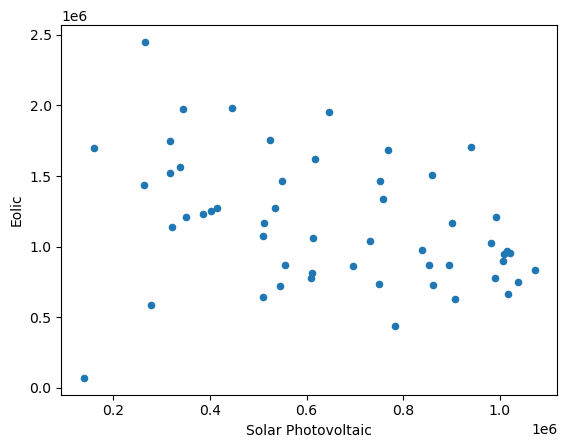

In [ ]:
df

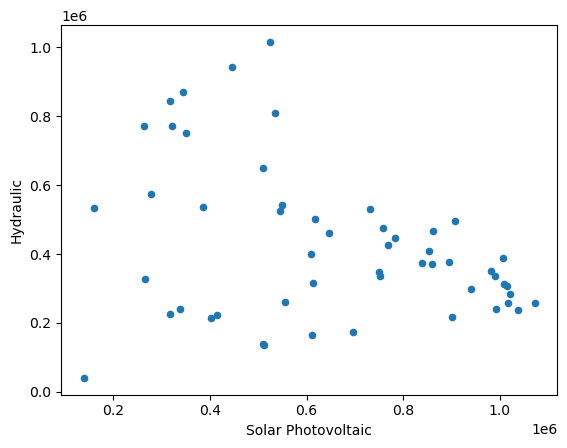

## Correlation Matrix

- [Plotly Express Overview](https://plotly.com/python/plotly-express/#overview)

### Scatter Matrix

In [19]:
import plotly.express as px

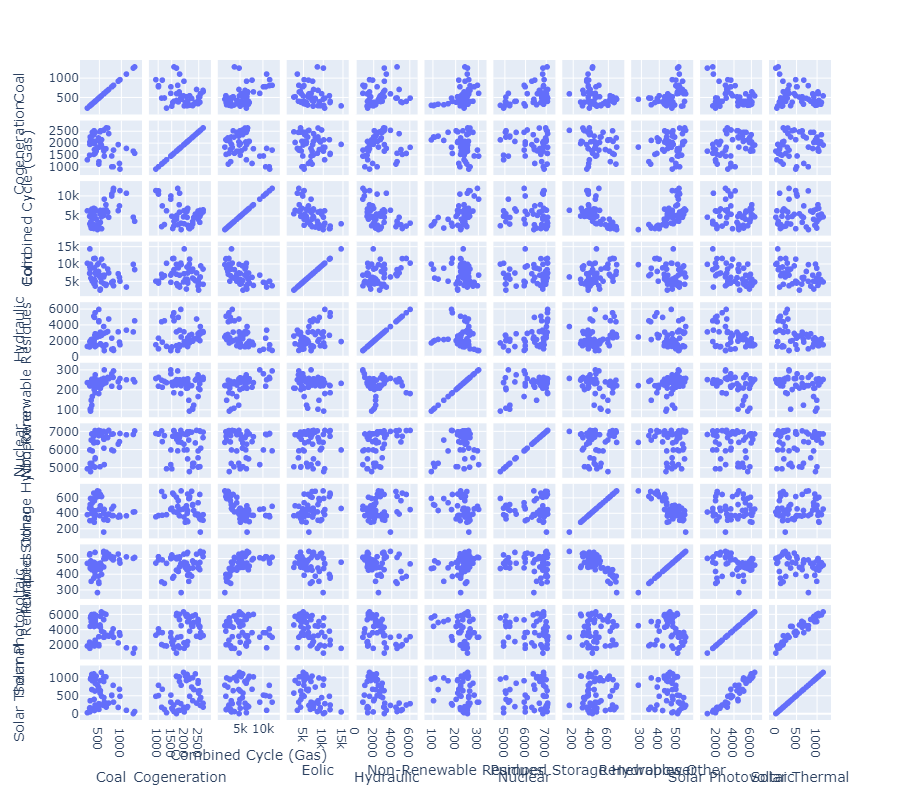

In [21]:
px.scatter_matrix(data_frame=df_weekly, height=800, width=800)

### Correlation Heatmap

In [28]:
dff = df_weekly.corr()
dff.style

,Coal,Cogeneration,Combined Cycle (Gas),Eolic,Hydraulic,Non-Renewable Residues,Nuclear,Pumped Storage Hydropower,Renewables Other,Solar Photovoltaic,Solar Thermal
Coal,1.000000,-0.341330,0.487464,-0.176352,0.120366,0.403748,0.390050,-0.269178,0.389689,-0.385212,-0.300069
Cogeneration,-0.341330,1.000000,-0.322895,-0.094021,0.072920,-0.208132,-0.199551,-0.169225,0.125703,0.352743,0.201751
Combined Cycle (Gas),0.487464,-0.322895,1.000000,-0.559629,-0.472859,0.495032,-0.028002,-0.590943,0.620094,-0.054335,-0.031272
Eolic,-0.176352,-0.094021,-0.559629,1.000000,0.359391,-0.231582,0.024881,0.351755,-0.255997,-0.485329,-0.441440
Hydraulic,0.120366,0.072920,-0.472859,0.359391,1.000000,-0.056570,0.397157,0.228756,-0.253956,-0.440798,-0.460564
Non-Renewable Residues,0.403748,-0.208132,0.495032,-0.231582,-0.056570,1.000000,0.322821,-0.332761,0.275271,-0.249293,-0.206852
Nuclear,0.390050,-0.199551,-0.028002,0.024881,0.397157,0.322821,1.000000,0.114866,-0.179829,-0.038945,0.071226
Pumped Storage Hydropower,-0.269178,-0.169225,-0.590943,0.351755,0.228756,-0.332761,0.114866,1.000000,-0.771008,-0.006017,0.060263
Renewables Other,0.389689,0.125703,0.620094,-0.255997,-0.253956,0.275271,-0.179829,-0.771008,1.000000,-0.184570,-0.241586
Solar Photovoltaic,-0.385212,0.352743,-0.054335,-0.485329,-0.440798,-0.249293,-0.038945,-0.006017,-0.184570,1.000000,0.961043


,Coal,Cogeneration,Combined Cycle (Gas),Eolic,Hydraulic,Non-Renewable Residues,Nuclear,Pumped Storage Hydropower,Renewables Other,Solar Photovoltaic,Solar Thermal
Coal,1.000000,-0.188149,0.518225,-0.084500,0.172777,0.463225,0.444694,-0.141163,0.445223,-0.296412,-0.249978
Cogeneration,-0.188149,1.000000,-0.182540,0.070660,0.172892,0.070449,0.181007,0.031765,0.382826,0.422146,0.244770
...,...,...,...,...,...,...,...,...,...,...,...
Solar Photovoltaic,-0.296412,0.422146,0.002034,-0.335556,-0.340156,-0.060634,0.151145,0.092960,0.049405,1.000000,0.955715
Solar Thermal,-0.249978,0.244770,-0.001624,-0.344434,-0.397340,-0.088349,0.150533,0.110195,-0.071333,0.955715,1.000000


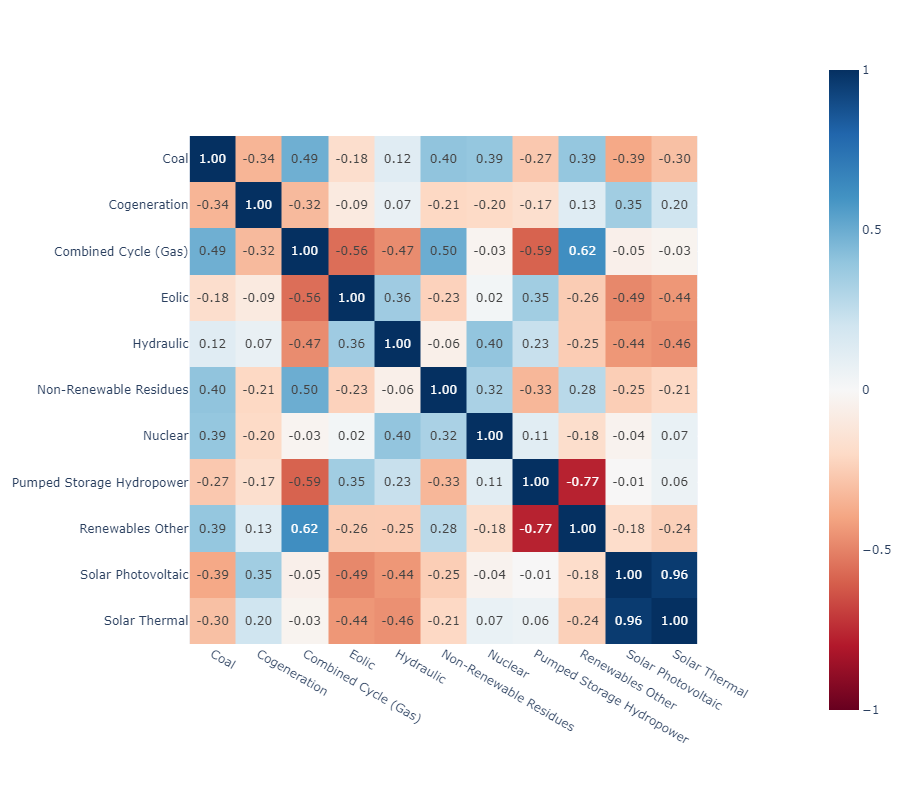

In [34]:
px.imshow(img=dff, height=800, width=800, text_auto='.2f', color_continuous_scale='RdBu', zmin=-1, zmax=1)

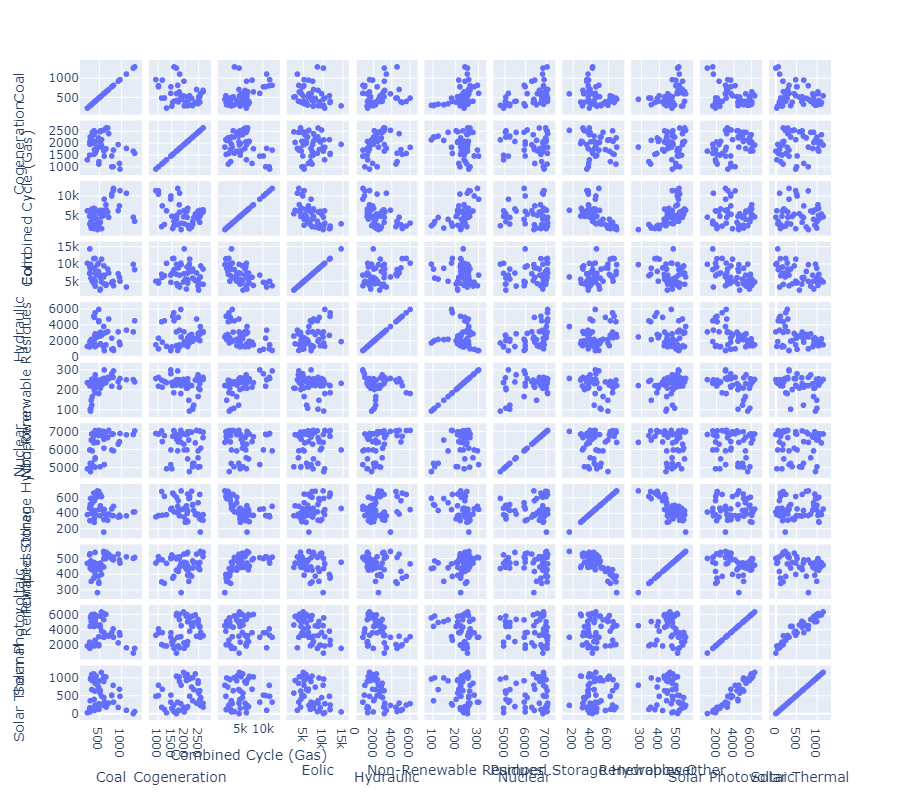

In [36]:
px.scatter_matrix(df_weekly, height=800, width=800)

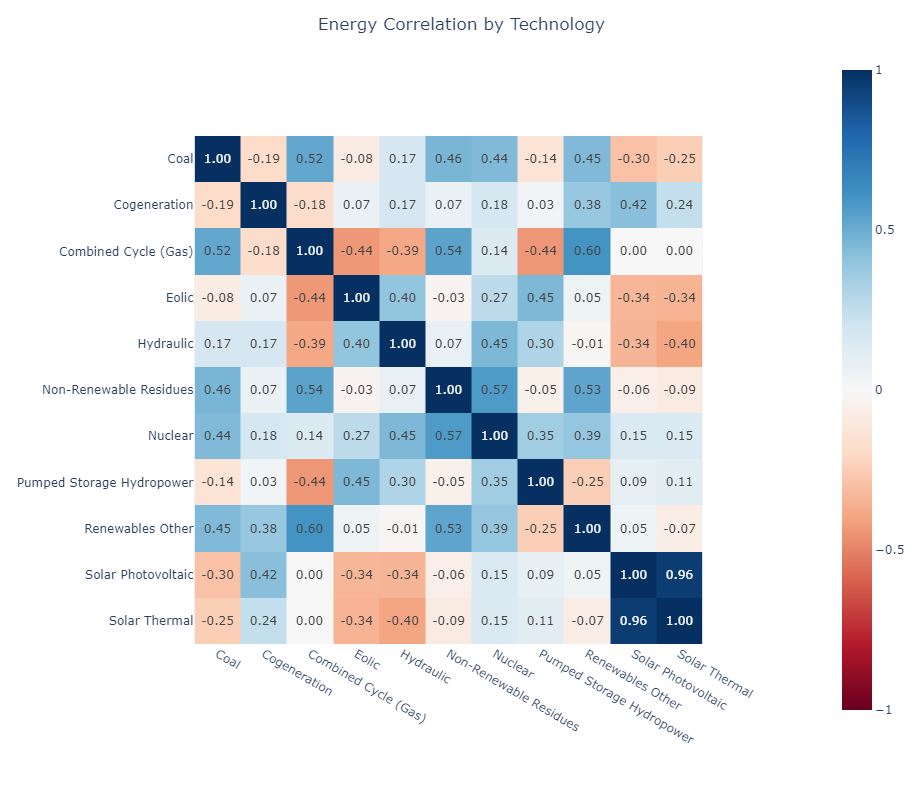

## Other Plots

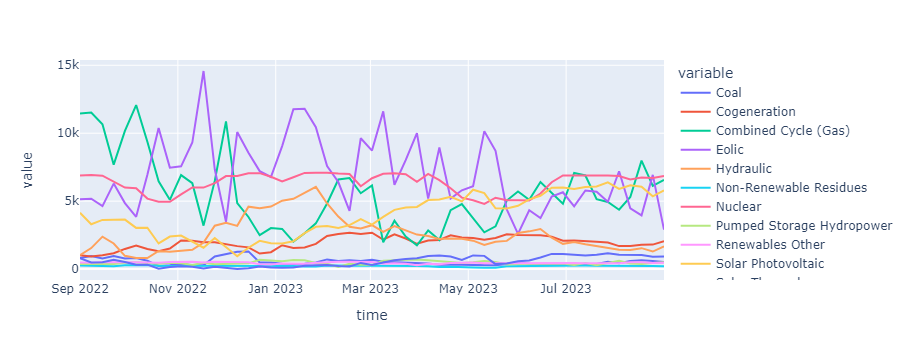

In [37]:
px.line(data_frame=df_weekly) #!

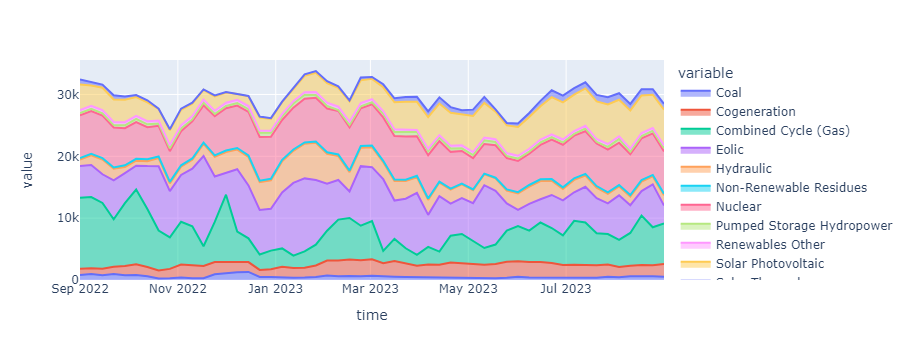

In [38]:
px.area(data_frame=df_weekly) #!

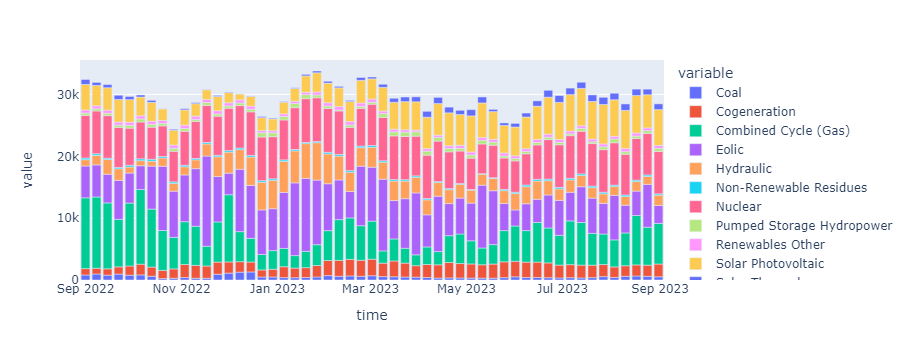

In [39]:
px.bar(data_frame=df_weekly) #!

## Pivot Tables

### Transform object to DataFrame

> Only if you don't have a DataFrame yet.

In [40]:
df

,Coal,Cogeneration,Combined Cycle (Gas),Eolic,Hydraulic,Non-Renewable Residues,Nuclear,Pumped Storage Hydropower,Renewables Other,Solar Photovoltaic,Solar Thermal
time,,,,,,,,,,,
2022-09-01 00:00:00,695.0,1155.1,14748.950,4387.050,899.675,273.7,6869.9,201.60,516.6,1.0,287.7
2022-09-01 01:00:00,750.0,1162.1,14255.600,4008.900,850.200,271.6,6881.9,117.70,514.4,1.0,247.7
...,...,...,...,...,...,...,...,...,...,...,...
2023-08-31 22:00:00,477.5,2153.4,10575.375,3057.950,3541.400,239.4,6866.0,946.25,510.7,17.6,607.9
2023-08-31 23:00:00,500.0,2127.7,9988.875,3028.675,3159.500,240.8,6869.0,334.95,511.9,17.4,619.8


### Time series categories in one column

In [42]:
dff = df.melt(ignore_index=False, value_name='generation', var_name='technology') #!
dff

,technology,generation
time,,
2022-09-01 00:00:00,Coal,695.0
2022-09-01 01:00:00,Coal,750.0
...,...,...
2023-08-31 22:00:00,Solar Thermal,607.9
2023-08-31 23:00:00,Solar Thermal,619.8


### Create columns with datetime information

In [43]:
dff = (dff
 .assign(
     year=lambda df: df.index.year,
     month=lambda df: df.index.month,
     day=lambda df: df.index.day,
     hour=lambda df: df.index.hour))

dff #!

,technology,generation,year,month,day,hour
time,,,,,,
2022-09-01 00:00:00,Coal,695.0,2022,9,1,0
2022-09-01 01:00:00,Coal,750.0,2022,9,1,1
...,...,...,...,...,...,...
2023-08-31 22:00:00,Solar Thermal,607.9,2023,8,31,22
2023-08-31 23:00:00,Solar Thermal,619.8,2023,8,31,23


### Process `pivot_table`

- Use this methodology.

In [46]:
dff = dff.pivot_table(values='generation', index='technology', columns=['year', 'month'], aggfunc='sum')

In [56]:
(dff
 .div(1_000_000)
 .sort_values(by=(2022, 9), ascending=False)
 .style
    .background_gradient()
    .format(precision=2))

In [44]:
dff

,technology,generation,year,month,day,hour
time,,,,,,
2022-09-01 00:00:00,Coal,695.0,2022,9,1,0
2022-09-01 01:00:00,Coal,750.0,2022,9,1,1
...,...,...,...,...,...,...
2023-08-31 22:00:00,Solar Thermal,607.9,2023,8,31,22
2023-08-31 23:00:00,Solar Thermal,619.8,2023,8,31,23


### Style DataFrame